In [0]:
import glob
from PIL import Image
import numpy as np

import os
import cv2
from tqdm.notebook import tqdm

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten ,Dropout,LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from tensorflow import keras
from keras import layers

from keras.models import Model
import tensorflow as tf
from sklearn.model_selection import train_test_split

%matplotlib inline
from keras.applications import VGG16

In [0]:

# 헤어 카테고리 리스트
categories = ['baby_perm','bob_cut','buzz_cut','crop_cut','c_curl_perm','dandy_cut'
             ,'dreadlocks','hippie_perm','hush_cut','layered_cut','mohican','part_perm'
             ,'pomade','wave_perm','wolf_cut']

# 카테고리의 갯수
nb_classes = len(categories)

In [0]:
for i in tqdm(categories):
    path = glob.glob('./Hair_Images/{}'.format(i))
    print(path)

['./Hair_Images/baby_perm']
['./Hair_Images/bob_cut']
['./Hair_Images/buzz_cut']
['./Hair_Images/crop_cut']
['./Hair_Images/c_curl_perm']
['./Hair_Images/dandy_cut']
['./Hair_Images/dreadlocks']
['./Hair_Images/hippie_perm']
['./Hair_Images/hush_cut']
['./Hair_Images/layered_cut']
['./Hair_Images/mohican']
['./Hair_Images/part_perm']
['./Hair_Images/pomade']
['./Hair_Images/wave_perm']
['./Hair_Images/wolf_cut']



In [0]:
for i in tqdm(categories):
    path = glob.glob('./Hair_Images/{}'.format(i))
    # 우선 os 모듈의 listdir을 사용해 특정 폴더에 있는 파일을 가져와 줍니다.
    print('path:',path)
    file_list = os.listdir(*path)
    file_list_png = [file for file in file_list if file.endswith(('.png','.jpg'))]
    print(file_list_png)
        
    save_path = "./2020-06-03save/{}".format(i)
    print(save_path)
    save_path2 = save_path + "/"
    print(save_path2)
    
    if not os.path.isdir(save_path):
        os.mkdir(save_path)
        print('없는카테고리폴더생성완료')
        
    print('수정된경로',path)
    
    for file_list in file_list_png:
        print(file_list)
        image_path = path[0] + '/' + file_list
        img =cv2.imread(image_path)
#         img =cv2.resize(img,(224,224),3)
        
        # height,weight를 resize해줍니다. 
        
        # 이미지를 축소할때 주로 사용하는 영역보간법 cv2.INTER_AREA 를 사용했습니다.
        dst = cv2.resize(img, dsize =(224,224),interpolation=cv2.INTER_AREA)
        cv2.imwrite(save_path2 + file_list, dst)

path: ['./Hair_Images/baby_perm']
['baby_perm_0000.png', 'baby_perm_0001.png', 'baby_perm_0002.png', 'baby_perm_0003.png', 'baby_perm_0004.png', 'baby_perm_0005.png', 'baby_perm_0006.png', 'baby_perm_0007.png', 'baby_perm_0008.png', 'baby_perm_0009.png', 'baby_perm_0010.png', 'baby_perm_0011.png', 'baby_perm_0012.png', 'baby_perm_0013.png', 'baby_perm_0014.png', 'baby_perm_0015.png', 'baby_perm_0016.png', 'baby_perm_0017.png', 'baby_perm_0018.png', 'baby_perm_0019.png', 'baby_perm_0020.png', 'baby_perm_0021.png', 'baby_perm_0022.png', 'baby_perm_0023.png', 'baby_perm_0024.png', 'baby_perm_0025.png', 'baby_perm_0026.png', 'baby_perm_0027.png', 'baby_perm_0028.png', 'baby_perm_0029.png', 'baby_perm_0030.png', 'baby_perm_0031.png', 'baby_perm_0032.png', 'baby_perm_0033.png', 'baby_perm_0034.png', 'baby_perm_0035.png', 'baby_perm_0036.png', 'baby_perm_0037.png', 'baby_perm_0038.png', 'baby_perm_0039.png', 'baby_perm_0040.png', 'baby_perm_0041.png', 'baby_perm_0042.png', 'baby_perm_0043.png

baby_perm_0037.png
baby_perm_0038.png
baby_perm_0039.png
baby_perm_0040.png
baby_perm_0041.png
baby_perm_0042.png
baby_perm_0043.png
baby_perm_0044.png
baby_perm_0045.png
baby_perm_0046.png
baby_perm_0047.png
baby_perm_0048.png
baby_perm_0049.png
baby_perm_0050.png
baby_perm_0051.png
baby_perm_0052.png
baby_perm_0053.png
baby_perm_0054.png
baby_perm_0055.png
baby_perm_0056.png
baby_perm_0057.png
baby_perm_0058.png
baby_perm_0059.png
baby_perm_0060.png
baby_perm_0061.png
baby_perm_0062.png
baby_perm_0063.png
baby_perm_0064.png
baby_perm_0065.png
baby_perm_0066.png
baby_perm_0067.png
baby_perm_0068.png
baby_perm_0069.png
baby_perm_0070.png
baby_perm_0071.png
baby_perm_0072.png
baby_perm_0073.png
baby_perm_0074.png
baby_perm_0075.png
baby_perm_0076.png
baby_perm_0077.png
baby_perm_0078.png
baby_perm_0079.png
baby_perm_0080.png
baby_perm_0081.png
baby_perm_0082.png
baby_perm_0083.png
baby_perm_0084.png
baby_perm_0085.png
baby_perm_0086.png
baby_perm_0087.png
baby_perm_0088.png
baby_perm_00

baby_perm_0492.png
baby_perm_0493.png
baby_perm_0494.png
baby_perm_0495.png
baby_perm_0496.png
baby_perm_0497.png
baby_perm_0498.png
baby_perm_0499.png
baby_perm_0500.png
baby_perm_0501.png
baby_perm_0502.png
baby_perm_0503.png
baby_perm_0504.png
baby_perm_0505.png
baby_perm_0506.png
baby_perm_0507.png
baby_perm_0508.png
baby_perm_0509.png
baby_perm_0510.png
baby_perm_0511.png
baby_perm_0512.png
baby_perm_0513.png
baby_perm_0514.png
baby_perm_0515.png
baby_perm_0516.png
baby_perm_0517.png
baby_perm_0518.png
baby_perm_0519.png
baby_perm_0520.png
baby_perm_0521.png
baby_perm_0522.png
baby_perm_0523.png
baby_perm_0524.png
baby_perm_0525.png
baby_perm_0526.png
baby_perm_0527.png
baby_perm_0528.png
baby_perm_0529.png
baby_perm_0530.png
baby_perm_0531.png
baby_perm_0532.png
baby_perm_0533.png
baby_perm_0534.png
baby_perm_0535.png
baby_perm_0536.png
baby_perm_0537.png
baby_perm_0538.png
baby_perm_0539.png
baby_perm_0540.png
baby_perm_0541.png
baby_perm_0542.png
baby_perm_0543.png
baby_perm_05

baby_perm_0934.png
baby_perm_0935.png
baby_perm_0936.png
baby_perm_0937.png
baby_perm_0938.png
baby_perm_0939.png
baby_perm_0940.png
baby_perm_0941.png
baby_perm_0942.png
baby_perm_0943.png
baby_perm_0944.png
baby_perm_0945.png
baby_perm_0946.png
baby_perm_0947.png
baby_perm_0948.png
baby_perm_0949.png
baby_perm_0950.png
baby_perm_0951.png
baby_perm_0952.png
baby_perm_0953.png
baby_perm_0954.png
baby_perm_0955.png
baby_perm_0956.png
baby_perm_0957.png
baby_perm_0958.png
baby_perm_0959.png
baby_perm_0960.png
baby_perm_0961.png
baby_perm_0962.png
baby_perm_0963.png
baby_perm_0964.png
baby_perm_0965.png
baby_perm_0966.png
baby_perm_0967.png
baby_perm_0968.png
baby_perm_0969.png
baby_perm_0970.png
baby_perm_0971.png
baby_perm_0972.png
baby_perm_0973.png
baby_perm_0974.png
baby_perm_0975.png
baby_perm_0976.png
baby_perm_0977.png
baby_perm_0978.png
baby_perm_0979.png
baby_perm_0980.png
baby_perm_0981.png
baby_perm_0982.png
baby_perm_0983.png
baby_perm_0984.png
baby_perm_0985.png
baby_perm_09

baby_perm_1393.png
baby_perm_1394.png
baby_perm_1395.png
baby_perm_1396.png
baby_perm_1397.png
baby_perm_1398.png
baby_perm_1399.png
baby_perm_1400.png
baby_perm_1401.png
baby_perm_1402.png
baby_perm_1403.png
baby_perm_1404.png
baby_perm_1405.png
baby_perm_1406.png
baby_perm_1407.png
baby_perm_1408.png
baby_perm_1409.png
baby_perm_1410.png
baby_perm_1411.png
baby_perm_1412.png
baby_perm_1413.png
baby_perm_1414.png
baby_perm_1415.png
baby_perm_1416.png
baby_perm_1417.png
baby_perm_1418.png
baby_perm_1419.png
baby_perm_1420.png
baby_perm_1421.png
baby_perm_1422.png
baby_perm_1423.png
baby_perm_1424.png
baby_perm_1425.png
baby_perm_1426.png
baby_perm_1427.png
baby_perm_1428.png
baby_perm_1429.png
baby_perm_1430.png
baby_perm_1431.png
baby_perm_1432.png
baby_perm_1433.png
baby_perm_1434.png
baby_perm_1435.png
baby_perm_1436.png
baby_perm_1437.png
baby_perm_1438.png
baby_perm_1439.png
baby_perm_1440.png
baby_perm_1441.png
baby_perm_1442.png
baby_perm_1443.png
baby_perm_1444.png
baby_perm_14

baby_perm_1858.png
baby_perm_1859.png
baby_perm_1860.png
baby_perm_1861.png
baby_perm_1862.png
baby_perm_1863.png
baby_perm_1864.png
baby_perm_1865.png
baby_perm_1866.png
baby_perm_1867.png
baby_perm_1868.png
baby_perm_1869.png
baby_perm_1870.png
baby_perm_1871.png
baby_perm_1872.png
baby_perm_1873.png
baby_perm_1874.png
baby_perm_1875.png
baby_perm_1876.png
baby_perm_1877.png
baby_perm_1878.png
baby_perm_1879.png
baby_perm_1880.png
baby_perm_1881.png
baby_perm_1882.png
baby_perm_1883.png
baby_perm_1884.png
baby_perm_1885.png
baby_perm_1886.png
baby_perm_1887.png
baby_perm_1888.png
baby_perm_1889.png
baby_perm_1890.png
baby_perm_1891.png
baby_perm_1892.png
baby_perm_1893.png
baby_perm_1894.png
baby_perm_1895.png
baby_perm_1896.png
baby_perm_1897.png
baby_perm_1898.png
baby_perm_1899.png
baby_perm_1900.png
baby_perm_1901.png
baby_perm_1902.png
baby_perm_1903.png
baby_perm_1904.png
baby_perm_1905.png
baby_perm_1906.png
baby_perm_1907.png
baby_perm_1908.png
baby_perm_1909.png
baby_perm_19

bob_cut_0009.png
bob_cut_0010.png
bob_cut_0011.png
bob_cut_0012.png
bob_cut_0013.png
bob_cut_0014.png
bob_cut_0015.png
bob_cut_0016.png
bob_cut_0017.png
bob_cut_0018.png
bob_cut_0019.png
bob_cut_0020.png
bob_cut_0021.png
bob_cut_0022.png
bob_cut_0023.png
bob_cut_0024.png
bob_cut_0025.png
bob_cut_0026.png
bob_cut_0027.png
bob_cut_0028.png
bob_cut_0029.png
bob_cut_0030.png
bob_cut_0031.png
bob_cut_0032.png
bob_cut_0033.png
bob_cut_0034.png
bob_cut_0035.png
bob_cut_0036.png
bob_cut_0037.png
bob_cut_0038.png
bob_cut_0039.png
bob_cut_0040.png
bob_cut_0041.png
bob_cut_0042.png
bob_cut_0043.png
bob_cut_0044.png
bob_cut_0045.png
bob_cut_0046.png
bob_cut_0047.png
bob_cut_0048.png
bob_cut_0049.png
bob_cut_0050.png
bob_cut_0051.png
bob_cut_0052.png
bob_cut_0053.png
bob_cut_0054.png
bob_cut_0055.png
bob_cut_0056.png
bob_cut_0057.png
bob_cut_0058.png
bob_cut_0059.png
bob_cut_0060.png
bob_cut_0061.png
bob_cut_0062.png
bob_cut_0063.png
bob_cut_0064.png
bob_cut_0065.png
bob_cut_0066.png
bob_cut_0067.p

bob_cut_0521.png
bob_cut_0522.png
bob_cut_0523.png
bob_cut_0524.png
bob_cut_0525.png
bob_cut_0526.png
bob_cut_0527.png
bob_cut_0528.png
bob_cut_0529.png
bob_cut_0530.png
bob_cut_0531.png
bob_cut_0532.png
bob_cut_0533.png
bob_cut_0534.png
bob_cut_0535.png
bob_cut_0536.png
bob_cut_0537.png
bob_cut_0538.png
bob_cut_0539.png
bob_cut_0540.png
bob_cut_0541.png
bob_cut_0542.png
bob_cut_0543.png
bob_cut_0544.png
bob_cut_0545.png
bob_cut_0546.png
bob_cut_0547.png
bob_cut_0548.png
bob_cut_0549.png
bob_cut_0550.png
bob_cut_0551.png
bob_cut_0552.png
bob_cut_0553.png
bob_cut_0554.png
bob_cut_0555.png
bob_cut_0556.png
bob_cut_0557.png
bob_cut_0558.png
bob_cut_0559.png
bob_cut_0560.png
bob_cut_0561.png
bob_cut_0562.png
bob_cut_0563.png
bob_cut_0564.png
bob_cut_0565.png
bob_cut_0566.png
bob_cut_0567.png
bob_cut_0568.png
bob_cut_0569.png
bob_cut_0570.png
bob_cut_0571.png
bob_cut_0572.png
bob_cut_0573.png
bob_cut_0574.png
bob_cut_0575.png
bob_cut_0576.png
bob_cut_0577.png
bob_cut_0578.png
bob_cut_0579.p

buzz_cut_0017.png
buzz_cut_0018.png
buzz_cut_0019.png
buzz_cut_0020.png
buzz_cut_0021.png
buzz_cut_0022.png
buzz_cut_0023.png
buzz_cut_0024.png
buzz_cut_0025.png
buzz_cut_0026.png
buzz_cut_0027.png
buzz_cut_0028.png
buzz_cut_0029.png
buzz_cut_0030.png
buzz_cut_0031.png
buzz_cut_0032.png
buzz_cut_0033.png
buzz_cut_0034.png
buzz_cut_0035.png
buzz_cut_0036.png
buzz_cut_0037.png
buzz_cut_0038.png
buzz_cut_0039.png
buzz_cut_0040.png
buzz_cut_0041.png
buzz_cut_0042.png
buzz_cut_0043.png
buzz_cut_0044.png
buzz_cut_0045.png
buzz_cut_0046.png
buzz_cut_0047.png
buzz_cut_0048.png
buzz_cut_0049.png
buzz_cut_0050.png
buzz_cut_0051.png
buzz_cut_0052.png
buzz_cut_0053.png
buzz_cut_0054.png
buzz_cut_0055.png
buzz_cut_0056.png
buzz_cut_0057.png
buzz_cut_0058.png
buzz_cut_0059.png
buzz_cut_0060.png
buzz_cut_0061.png
buzz_cut_0062.png
buzz_cut_0063.png
buzz_cut_0064.png
buzz_cut_0065.png
buzz_cut_0066.png
buzz_cut_0067.png
buzz_cut_0068.png
buzz_cut_0069.png
buzz_cut_0070.png
buzz_cut_0071.png
buzz_cut_0

crop_cut_0009.png
crop_cut_0010.png
crop_cut_0011.png
crop_cut_0012.png
crop_cut_0013.png
crop_cut_0014.png
crop_cut_0015.png
crop_cut_0016.png
crop_cut_0017.png
crop_cut_0018.png
crop_cut_0019.png
crop_cut_0020.png
crop_cut_0021.png
crop_cut_0022.png
crop_cut_0023.png
crop_cut_0024.png
crop_cut_0025.png
crop_cut_0026.png
crop_cut_0027.png
crop_cut_0028.png
crop_cut_0029.png
crop_cut_0030.png
crop_cut_0031.png
crop_cut_0032.png
crop_cut_0033.png
crop_cut_0034.png
crop_cut_0035.png
crop_cut_0036.png
crop_cut_0037.png
crop_cut_0038.png
crop_cut_0039.png
crop_cut_0040.png
crop_cut_0041.png
crop_cut_0042.png
crop_cut_0043.png
crop_cut_0044.png
crop_cut_0045.png
crop_cut_0046.png
crop_cut_0047.png
crop_cut_0048.png
crop_cut_0049.png
crop_cut_0050.png
crop_cut_0051.png
crop_cut_0052.png
crop_cut_0053.png
crop_cut_0054.png
crop_cut_0055.png
crop_cut_0056.png
crop_cut_0057.png
crop_cut_0058.png
crop_cut_0059.png
crop_cut_0060.png
crop_cut_0061.png
crop_cut_0062.png
crop_cut_0063.png
crop_cut_0

crop_cut_0466.png
crop_cut_0467.png
crop_cut_0468.png
crop_cut_0469.png
crop_cut_0470.png
crop_cut_0471.png
crop_cut_0472.png
crop_cut_0473.png
crop_cut_0474.png
crop_cut_0475.png
crop_cut_0476.png
crop_cut_0477.png
crop_cut_0478.png
crop_cut_0479.png
crop_cut_0480.png
crop_cut_0481.png
crop_cut_0482.png
crop_cut_0483.png
crop_cut_0484.png
crop_cut_0485.png
crop_cut_0486.png
crop_cut_0487.png
crop_cut_0488.png
crop_cut_0489.png
crop_cut_0490.png
crop_cut_0491.png
crop_cut_0492.png
crop_cut_0493.png
crop_cut_0494.png
crop_cut_0495.png
crop_cut_0496.png
crop_cut_0497.png
crop_cut_0498.png
crop_cut_0499.png
crop_cut_0500.png
crop_cut_0501.png
crop_cut_0502.png
crop_cut_0503.png
crop_cut_0504.png
crop_cut_0505.png
crop_cut_0506.png
crop_cut_0507.png
crop_cut_0508.png
crop_cut_0509.png
crop_cut_0510.png
crop_cut_0511.png
crop_cut_0512.png
crop_cut_0513.png
crop_cut_0514.png
crop_cut_0515.png
crop_cut_0516.png
crop_cut_0517.png
crop_cut_0518.png
crop_cut_0519.png
crop_cut_0520.png
crop_cut_0

c_curl_perm_0013.png
c_curl_perm_0014.png
c_curl_perm_0015.png
c_curl_perm_0016.png
c_curl_perm_0017.png
c_curl_perm_0018.png
c_curl_perm_0019.png
c_curl_perm_0020.png
c_curl_perm_0021.png
c_curl_perm_0022.png
c_curl_perm_0023.png
c_curl_perm_0024.png
c_curl_perm_0025.png
c_curl_perm_0026.png
c_curl_perm_0027.png
c_curl_perm_0028.png
c_curl_perm_0029.png
c_curl_perm_0030.png
c_curl_perm_0031.png
c_curl_perm_0032.png
c_curl_perm_0033.png
c_curl_perm_0034.png
c_curl_perm_0035.png
c_curl_perm_0036.png
c_curl_perm_0037.png
c_curl_perm_0038.png
c_curl_perm_0039.png
c_curl_perm_0040.png
c_curl_perm_0041.png
c_curl_perm_0042.png
c_curl_perm_0043.png
c_curl_perm_0044.png
c_curl_perm_0045.png
c_curl_perm_0046.png
c_curl_perm_0047.png
c_curl_perm_0048.png
c_curl_perm_0049.png
c_curl_perm_0050.png
c_curl_perm_0051.png
c_curl_perm_0052.png
c_curl_perm_0053.png
c_curl_perm_0054.png
c_curl_perm_0055.png
c_curl_perm_0056.png
c_curl_perm_0057.png
c_curl_perm_0058.png
c_curl_perm_0059.png
c_curl_perm_0

c_curl_perm_0410.png
c_curl_perm_0411.png
c_curl_perm_0412.png
c_curl_perm_0413.png
c_curl_perm_0414.png
c_curl_perm_0415.png
c_curl_perm_0416.png
c_curl_perm_0417.png
c_curl_perm_0418.png
c_curl_perm_0419.png
c_curl_perm_0420.png
c_curl_perm_0421.png
c_curl_perm_0422.png
c_curl_perm_0423.png
c_curl_perm_0424.png
c_curl_perm_0425.png
c_curl_perm_0426.png
c_curl_perm_0427.png
c_curl_perm_0428.png
c_curl_perm_0429.png
c_curl_perm_0430.png
c_curl_perm_0431.png
c_curl_perm_0432.png
c_curl_perm_0433.png
c_curl_perm_0434.png
c_curl_perm_0435.png
c_curl_perm_0436.png
c_curl_perm_0437.png
c_curl_perm_0438.png
c_curl_perm_0439.png
c_curl_perm_0440.png
c_curl_perm_0441.png
c_curl_perm_0442.png
c_curl_perm_0443.png
c_curl_perm_0444.png
c_curl_perm_0445.png
c_curl_perm_0446.png
c_curl_perm_0447.png
c_curl_perm_0448.png
c_curl_perm_0449.png
c_curl_perm_0450.png
c_curl_perm_0451.png
c_curl_perm_0452.png
c_curl_perm_0453.png
c_curl_perm_0454.png
c_curl_perm_0455.png
c_curl_perm_0456.png
c_curl_perm_0

c_curl_perm_0810.png
c_curl_perm_0811.png
c_curl_perm_0812.png
c_curl_perm_0813.png
c_curl_perm_0814.png
c_curl_perm_0815.png
c_curl_perm_0816.png
c_curl_perm_0817.png
c_curl_perm_0818.png
c_curl_perm_0819.png
c_curl_perm_0820.png
c_curl_perm_0821.png
c_curl_perm_0822.png
c_curl_perm_0823.png
c_curl_perm_0824.png
c_curl_perm_0825.png
c_curl_perm_0826.png
c_curl_perm_0827.png
c_curl_perm_0828.png
c_curl_perm_0829.png
c_curl_perm_0830.png
c_curl_perm_0831.png
c_curl_perm_0832.png
c_curl_perm_0833.png
c_curl_perm_0834.png
c_curl_perm_0835.png
c_curl_perm_0836.png
c_curl_perm_0837.png
c_curl_perm_0838.png
c_curl_perm_0839.png
c_curl_perm_0840.png
c_curl_perm_0841.png
c_curl_perm_0842.png
c_curl_perm_0843.png
c_curl_perm_0844.png
c_curl_perm_0845.png
c_curl_perm_0846.png
c_curl_perm_0847.png
c_curl_perm_0848.png
c_curl_perm_0849.png
c_curl_perm_0850.png
c_curl_perm_0851.png
c_curl_perm_0852.png
c_curl_perm_0853.png
c_curl_perm_0854.png
c_curl_perm_0855.png
c_curl_perm_0856.png
c_curl_perm_0

dandy_cut_0017.png
dandy_cut_0018.png
dandy_cut_0019.png
dandy_cut_0020.png
dandy_cut_0021.png
dandy_cut_0022.png
dandy_cut_0023.png
dandy_cut_0024.png
dandy_cut_0025.png
dandy_cut_0026.png
dandy_cut_0027.png
dandy_cut_0028.png
dandy_cut_0029.png
dandy_cut_0030.png
dandy_cut_0031.png
dandy_cut_0032.png
dandy_cut_0033.png
dandy_cut_0034.png
dandy_cut_0035.png
dandy_cut_0036.png
dandy_cut_0037.png
dandy_cut_0038.png
dandy_cut_0039.png
dandy_cut_0040.png
dandy_cut_0041.png
dandy_cut_0042.png
dandy_cut_0043.png
dandy_cut_0044.png
dandy_cut_0045.png
dandy_cut_0046.png
dandy_cut_0047.png
dandy_cut_0048.png
dandy_cut_0049.png
dandy_cut_0050.png
dandy_cut_0051.png
dandy_cut_0052.png
dandy_cut_0053.png
dandy_cut_0054.png
dandy_cut_0055.png
dandy_cut_0056.png
dandy_cut_0057.png
dandy_cut_0058.png
dandy_cut_0059.png
dandy_cut_0060.png
dandy_cut_0061.png
dandy_cut_0062.png
dandy_cut_0063.png
dandy_cut_0064.png
dandy_cut_0065.png
dandy_cut_0066.png
dandy_cut_0067.png
dandy_cut_0068.png
dandy_cut_00

dandy_cut_0452.png
dandy_cut_0453.png
dandy_cut_0454.png
dandy_cut_0455.png
dandy_cut_0456.png
dandy_cut_0457.png
dandy_cut_0458.png
dandy_cut_0459.png
dandy_cut_0460.png
dandy_cut_0461.png
dandy_cut_0462.png
dandy_cut_0463.png
dandy_cut_0464.png
dandy_cut_0465.png
dandy_cut_0466.png
dandy_cut_0467.png
dandy_cut_0468.png
dandy_cut_0469.png
dandy_cut_0470.png
dandy_cut_0471.png
dandy_cut_0472.png
dandy_cut_0473.png
dandy_cut_0474.png
dandy_cut_0475.png
dandy_cut_0476.png
dandy_cut_0477.png
dandy_cut_0478.png
dandy_cut_0479.png
dandy_cut_0480.png
dandy_cut_0481.png
dandy_cut_0482.png
dandy_cut_0483.png
dandy_cut_0484.png
dandy_cut_0485.png
dandy_cut_0486.png
dandy_cut_0487.png
dandy_cut_0488.png
dandy_cut_0489.png
dandy_cut_0490.png
dandy_cut_0491.png
dandy_cut_0492.png
path: ['./Hair_Images/dreadlocks']
['dreadlocks_0000.png', 'dreadlocks_0001.png', 'dreadlocks_0002.png', 'dreadlocks_0003.png', 'dreadlocks_0004.png', 'dreadlocks_0005.png', 'dreadlocks_0006.png', 'dreadlocks_0007.png', '

dreadlocks_0030.png
dreadlocks_0031.png
dreadlocks_0032.png
dreadlocks_0033.png
dreadlocks_0034.png
dreadlocks_0035.png
dreadlocks_0036.png
dreadlocks_0037.png
dreadlocks_0038.png
dreadlocks_0039.png
dreadlocks_0040.png
dreadlocks_0041.png
dreadlocks_0042.png
dreadlocks_0043.png
dreadlocks_0044.png
dreadlocks_0045.png
dreadlocks_0046.png
dreadlocks_0047.png
dreadlocks_0048.png
dreadlocks_0049.png
dreadlocks_0050.png
dreadlocks_0051.png
dreadlocks_0052.png
dreadlocks_0053.png
dreadlocks_0054.png
dreadlocks_0055.png
dreadlocks_0056.png
dreadlocks_0057.png
dreadlocks_0058.png
dreadlocks_0059.png
dreadlocks_0060.png
dreadlocks_0061.png
dreadlocks_0062.png
dreadlocks_0063.png
dreadlocks_0064.png
dreadlocks_0065.png
dreadlocks_0066.png
dreadlocks_0067.png
dreadlocks_0068.png
dreadlocks_0069.png
dreadlocks_0070.png
dreadlocks_0071.png
dreadlocks_0072.png
dreadlocks_0073.png
dreadlocks_0074.png
dreadlocks_0075.png
dreadlocks_0076.png
dreadlocks_0077.png
dreadlocks_0078.png
dreadlocks_0079.png


dreadlocks_0453.png
dreadlocks_0454.png
dreadlocks_0455.png
dreadlocks_0456.png
dreadlocks_0457.png
dreadlocks_0458.png
dreadlocks_0459.png
dreadlocks_0460.png
dreadlocks_0461.png
dreadlocks_0462.png
dreadlocks_0463.png
dreadlocks_0464.png
dreadlocks_0465.png
dreadlocks_0466.png
dreadlocks_0467.png
dreadlocks_0468.png
dreadlocks_0469.png
dreadlocks_0470.png
dreadlocks_0471.png
dreadlocks_0472.png
dreadlocks_0473.png
dreadlocks_0474.png
dreadlocks_0475.png
dreadlocks_0476.png
dreadlocks_0477.png
dreadlocks_0478.png
dreadlocks_0479.png
dreadlocks_0480.png
dreadlocks_0481.png
dreadlocks_0482.png
dreadlocks_0483.png
dreadlocks_0484.png
dreadlocks_0485.png
dreadlocks_0486.png
dreadlocks_0487.png
dreadlocks_0488.png
dreadlocks_0489.png
dreadlocks_0490.png
dreadlocks_0491.png
dreadlocks_0492.png
dreadlocks_0493.png
dreadlocks_0494.png
dreadlocks_0495.png
dreadlocks_0496.png
dreadlocks_0497.png
dreadlocks_0498.png
dreadlocks_0499.png
dreadlocks_0500.png
dreadlocks_0501.png
dreadlocks_0502.png


dreadlocks_0892.png
dreadlocks_0893.png
dreadlocks_0894.png
dreadlocks_0895.png
dreadlocks_0896.png
dreadlocks_0897.png
dreadlocks_0898.png
dreadlocks_0899.png
dreadlocks_0900.png
dreadlocks_0901.png
dreadlocks_0902.png
dreadlocks_0903.png
dreadlocks_0904.png
dreadlocks_0905.png
dreadlocks_0906.png
dreadlocks_0907.png
dreadlocks_0908.png
dreadlocks_0909.png
dreadlocks_0910.png
dreadlocks_0911.png
dreadlocks_0912.png
dreadlocks_0913.png
dreadlocks_0914.png
dreadlocks_0915.png
dreadlocks_0916.png
dreadlocks_0917.png
dreadlocks_0918.png
dreadlocks_0919.png
dreadlocks_0920.png
dreadlocks_0921.png
dreadlocks_0922.png
dreadlocks_0923.png
dreadlocks_0924.png
dreadlocks_0925.png
dreadlocks_0926.png
dreadlocks_0927.png
dreadlocks_0928.png
dreadlocks_0929.png
dreadlocks_0930.png
dreadlocks_0931.png
dreadlocks_0932.png
dreadlocks_0933.png
dreadlocks_0934.png
dreadlocks_0935.png
dreadlocks_0936.png
dreadlocks_0937.png
dreadlocks_0938.png
dreadlocks_0939.png
dreadlocks_0940.png
dreadlocks_0941.png


hippie_perm_0011.png
hippie_perm_0012.png
hippie_perm_0013.png
hippie_perm_0014.png
hippie_perm_0015.png
hippie_perm_0016.png
hippie_perm_0017.png
hippie_perm_0018.png
hippie_perm_0019.png
hippie_perm_0020.png
hippie_perm_0021.png
hippie_perm_0022.png
hippie_perm_0023.png
hippie_perm_0024.png
hippie_perm_0025.png
hippie_perm_0026.png
hippie_perm_0027.png
hippie_perm_0028.png
hippie_perm_0029.png
hippie_perm_0030.png
hippie_perm_0031.png
hippie_perm_0032.png
hippie_perm_0033.png
hippie_perm_0034.png
hippie_perm_0035.png
hippie_perm_0036.png
hippie_perm_0037.png
hippie_perm_0038.png
hippie_perm_0039.png
hippie_perm_0040.png
hippie_perm_0041.png
hippie_perm_0042.png
hippie_perm_0043.png
hippie_perm_0044.png
hippie_perm_0045.png
hippie_perm_0046.png
hippie_perm_0047.png
hippie_perm_0048.png
hippie_perm_0049.png
hippie_perm_0050.png
hippie_perm_0051.png
hippie_perm_0052.png
hippie_perm_0053.png
hippie_perm_0054.png
hippie_perm_0055.png
hippie_perm_0056.png
hippie_perm_0057.png
hippie_perm_0

hippie_perm_0427.png
hippie_perm_0428.png
hippie_perm_0429.png
hippie_perm_0430.png
hippie_perm_0431.png
hippie_perm_0432.png
hippie_perm_0433.png
hippie_perm_0434.png
hippie_perm_0435.png
hippie_perm_0436.png
hippie_perm_0437.png
hippie_perm_0438.png
hippie_perm_0439.png
hippie_perm_0440.png
hippie_perm_0441.png
hippie_perm_0442.png
hippie_perm_0443.png
hippie_perm_0444.png
hippie_perm_0445.png
hippie_perm_0446.png
hippie_perm_0447.png
hippie_perm_0448.png
hippie_perm_0449.png
hippie_perm_0450.png
hippie_perm_0451.png
hippie_perm_0452.png
hippie_perm_0453.png
hippie_perm_0454.png
hippie_perm_0455.png
hippie_perm_0456.png
hippie_perm_0457.png
hippie_perm_0458.png
hippie_perm_0459.png
hippie_perm_0460.png
hippie_perm_0461.png
hippie_perm_0462.png
hippie_perm_0463.png
hippie_perm_0464.png
hippie_perm_0465.png
hippie_perm_0466.png
hippie_perm_0467.png
hippie_perm_0468.png
hippie_perm_0469.png
hippie_perm_0470.png
hippie_perm_0471.png
hippie_perm_0472.png
hippie_perm_0473.png
hippie_perm_0

hush_cut_0011.png
hush_cut_0012.png
hush_cut_0013.png
hush_cut_0014.png
hush_cut_0015.png
hush_cut_0016.png
hush_cut_0017.png
hush_cut_0018.png
hush_cut_0019.png
hush_cut_0020.png
hush_cut_0021.png
hush_cut_0022.png
hush_cut_0023.png
hush_cut_0024.png
hush_cut_0025.png
hush_cut_0026.png
hush_cut_0027.png
hush_cut_0028.png
hush_cut_0029.png
hush_cut_0030.png
hush_cut_0031.png
hush_cut_0032.png
hush_cut_0033.png
hush_cut_0034.png
hush_cut_0035.png
hush_cut_0036.png
hush_cut_0037.png
hush_cut_0038.png
hush_cut_0039.png
hush_cut_0040.png
hush_cut_0041.png
hush_cut_0042.png
hush_cut_0043.png
hush_cut_0044.png
hush_cut_0045.png
hush_cut_0046.png
hush_cut_0047.png
hush_cut_0048.png
hush_cut_0049.png
hush_cut_0050.png
hush_cut_0051.png
hush_cut_0052.png
hush_cut_0053.png
hush_cut_0054.png
hush_cut_0055.png
hush_cut_0056.png
hush_cut_0057.png
hush_cut_0058.png
hush_cut_0059.png
hush_cut_0060.png
hush_cut_0061.png
hush_cut_0062.png
hush_cut_0063.png
hush_cut_0064.png
hush_cut_0065.png
hush_cut_0

hush_cut_0475.png
hush_cut_0476.png
hush_cut_0477.png
hush_cut_0478.png
hush_cut_0479.png
hush_cut_0480.png
hush_cut_0481.png
hush_cut_0482.png
hush_cut_0483.png
hush_cut_0484.png
hush_cut_0485.png
hush_cut_0486.png
hush_cut_0487.png
hush_cut_0488.png
hush_cut_0489.png
hush_cut_0490.png
hush_cut_0491.png
hush_cut_0492.png
hush_cut_0493.png
hush_cut_0494.png
hush_cut_0495.png
hush_cut_0496.png
hush_cut_0497.png
hush_cut_0498.png
hush_cut_0499.png
hush_cut_0500.png
hush_cut_0501.png
hush_cut_0502.png
hush_cut_0503.png
hush_cut_0504.png
hush_cut_0505.png
hush_cut_0506.png
hush_cut_0507.png
hush_cut_0508.png
hush_cut_0509.png
hush_cut_0510.png
hush_cut_0511.png
hush_cut_0512.png
hush_cut_0513.png
hush_cut_0514.png
hush_cut_0515.png
hush_cut_0516.png
hush_cut_0517.png
hush_cut_0518.png
hush_cut_0519.png
hush_cut_0520.png
hush_cut_0521.png
hush_cut_0522.png
hush_cut_0523.png
hush_cut_0524.png
hush_cut_0525.png
hush_cut_0526.png
hush_cut_0527.png
hush_cut_0528.png
hush_cut_0529.png
hush_cut_0

layered_cut_0034.png
layered_cut_0035.png
layered_cut_0036.png
layered_cut_0037.png
layered_cut_0038.png
layered_cut_0039.png
layered_cut_0040.png
layered_cut_0041.png
layered_cut_0042.png
layered_cut_0043.png
layered_cut_0044.png
layered_cut_0045.png
layered_cut_0046.png
layered_cut_0047.png
layered_cut_0048.png
layered_cut_0049.png
layered_cut_0050.png
layered_cut_0051.png
layered_cut_0052.png
layered_cut_0053.png
layered_cut_0054.png
layered_cut_0055.png
layered_cut_0056.png
layered_cut_0057.png
layered_cut_0058.png
layered_cut_0059.png
layered_cut_0060.png
layered_cut_0061.png
layered_cut_0062.png
layered_cut_0063.png
layered_cut_0064.png
layered_cut_0065.png
layered_cut_0066.png
layered_cut_0067.png
layered_cut_0068.png
layered_cut_0069.png
layered_cut_0070.png
layered_cut_0071.png
layered_cut_0072.png
layered_cut_0073.png
layered_cut_0074.png
layered_cut_0075.png
layered_cut_0076.png
layered_cut_0077.png
layered_cut_0078.png
layered_cut_0079.png
layered_cut_0080.png
layered_cut_0

mohican_0022.png
mohican_0023.png
mohican_0024.png
mohican_0025.png
mohican_0026.png
mohican_0027.png
mohican_0028.png
mohican_0029.png
mohican_0030.png
mohican_0031.png
mohican_0032.png
mohican_0033.png
mohican_0034.png
mohican_0035.png
mohican_0036.png
mohican_0037.png
mohican_0038.png
mohican_0039.png
mohican_0040.png
mohican_0041.png
mohican_0042.png
mohican_0043.png
mohican_0044.png
mohican_0045.png
mohican_0046.png
mohican_0047.png
mohican_0048.png
mohican_0049.png
mohican_0050.png
mohican_0051.png
mohican_0052.png
mohican_0053.png
mohican_0054.png
mohican_0055.png
mohican_0056.png
mohican_0057.png
mohican_0058.png
mohican_0059.png
mohican_0060.png
mohican_0061.png
mohican_0062.png
mohican_0063.png
mohican_0064.png
mohican_0065.png
mohican_0066.png
mohican_0067.png
mohican_0068.png
mohican_0069.png
mohican_0070.png
mohican_0071.png
mohican_0072.png
mohican_0073.png
mohican_0074.png
mohican_0075.png
mohican_0076.png
mohican_0077.png
mohican_0078.png
mohican_0079.png
mohican_0080.p

mohican_0513.png
mohican_0514.png
mohican_0515.png
mohican_0516.png
mohican_0517.png
mohican_0518.png
mohican_0519.png
mohican_0520.png
mohican_0521.png
mohican_0522.png
mohican_0523.png
mohican_0524.png
mohican_0525.png
mohican_0526.png
mohican_0527.png
mohican_0528.png
mohican_0529.png
mohican_0530.png
mohican_0531.png
mohican_0532.png
mohican_0533.png
mohican_0534.png
mohican_0535.png
mohican_0536.png
mohican_0537.png
mohican_0538.png
mohican_0539.png
mohican_0540.png
mohican_0541.png
mohican_0542.png
mohican_0543.png
mohican_0544.png
mohican_0545.png
mohican_0546.png
mohican_0547.png
mohican_0548.png
mohican_0549.png
mohican_0550.png
mohican_0551.png
mohican_0552.png
mohican_0553.png
mohican_0554.png
mohican_0555.png
mohican_0556.png
mohican_0557.png
mohican_0558.png
mohican_0559.png
mohican_0560.png
mohican_0561.png
mohican_0562.png
mohican_0563.png
mohican_0564.png
mohican_0565.png
mohican_0566.png
mohican_0567.png
mohican_0568.png
mohican_0569.png
mohican_0570.png
mohican_0571.p

part_perm_0034.png
part_perm_0035.png
part_perm_0036.png
part_perm_0037.png
part_perm_0038.png
part_perm_0039.png
part_perm_0040.png
part_perm_0041.png
part_perm_0042.png
part_perm_0043.png
part_perm_0044.png
part_perm_0045.png
part_perm_0046.png
part_perm_0047.png
part_perm_0048.png
part_perm_0049.png
part_perm_0050.png
part_perm_0051.png
part_perm_0052.png
part_perm_0053.png
part_perm_0054.png
part_perm_0055.png
part_perm_0056.png
part_perm_0057.png
part_perm_0058.png
part_perm_0059.png
part_perm_0060.png
part_perm_0061.png
part_perm_0062.png
part_perm_0063.png
part_perm_0064.png
part_perm_0065.png
part_perm_0066.png
part_perm_0067.png
part_perm_0068.png
part_perm_0069.png
part_perm_0070.png
part_perm_0071.png
part_perm_0072.png
part_perm_0073.png
part_perm_0074.png
part_perm_0075.png
part_perm_0076.png
part_perm_0077.png
part_perm_0078.png
part_perm_0079.png
part_perm_0080.png
part_perm_0081.png
part_perm_0082.png
part_perm_0083.png
part_perm_0084.png
part_perm_0085.png
part_perm_00

part_perm_0496.png
part_perm_0497.png
part_perm_0498.png
part_perm_0499.png
part_perm_0500.png
part_perm_0501.png
part_perm_0502.png
part_perm_0503.png
part_perm_0504.png
part_perm_0505.png
part_perm_0506.png
part_perm_0507.png
part_perm_0508.png
part_perm_0509.png
part_perm_0510.png
part_perm_0511.png
part_perm_0512.png
part_perm_0513.png
part_perm_0514.png
part_perm_0515.png
part_perm_0516.png
part_perm_0517.png
part_perm_0518.png
part_perm_0519.png
part_perm_0520.png
part_perm_0521.png
part_perm_0522.png
part_perm_0523.png
part_perm_0524.png
part_perm_0525.png
part_perm_0526.png
part_perm_0527.png
part_perm_0528.png
part_perm_0529.png
part_perm_0530.png
part_perm_0531.png
part_perm_0532.png
part_perm_0533.png
part_perm_0534.png
part_perm_0535.png
part_perm_0536.png
part_perm_0537.png
part_perm_0538.png
part_perm_0539.png
part_perm_0540.png
part_perm_0541.png
part_perm_0542.png
part_perm_0543.png
part_perm_0544.png
part_perm_0545.png
part_perm_0546.png
part_perm_0547.png
part_perm_05

part_perm_0932.png
part_perm_0933.png
part_perm_0934.png
part_perm_0935.png
part_perm_0936.png
part_perm_0937.png
part_perm_0938.png
part_perm_0939.png
part_perm_0940.png
part_perm_0941.png
part_perm_0942.png
part_perm_0943.png
part_perm_0944.png
part_perm_0945.png
part_perm_0946.png
part_perm_0947.png
part_perm_0948.png
part_perm_0949.png
part_perm_0950.png
part_perm_0951.png
part_perm_0952.png
part_perm_0953.png
part_perm_0954.png
part_perm_0955.png
part_perm_0956.png
part_perm_0957.png
part_perm_0958.png
part_perm_0959.png
part_perm_0960.png
part_perm_0961.png
part_perm_0962.png
part_perm_0963.png
part_perm_0964.png
part_perm_0965.png
part_perm_0966.png
part_perm_0967.png
part_perm_0968.png
part_perm_0969.png
part_perm_0970.png
part_perm_0971.png
part_perm_0972.png
part_perm_0973.png
part_perm_0974.png
part_perm_0975.png
part_perm_0976.png
part_perm_0977.png
part_perm_0978.png
part_perm_0979.png
part_perm_0980.png
part_perm_0981.png
part_perm_0982.png
part_perm_0983.png
part_perm_09

pomade_0001.png
pomade_0002.png
pomade_0003.png
pomade_0004.png
pomade_0005.png
pomade_0006.png
pomade_0007.png
pomade_0008.png
pomade_0009.png
pomade_0010.png
pomade_0011.png
pomade_0012.png
pomade_0013.png
pomade_0014.png
pomade_0015.png
pomade_0016.png
pomade_0017.png
pomade_0018.png
pomade_0019.png
pomade_0020.png
pomade_0021.png
pomade_0022.png
pomade_0023.png
pomade_0024.png
pomade_0025.png
pomade_0026.png
pomade_0027.png
pomade_0028.png
pomade_0029.png
pomade_0030.png
pomade_0031.png
pomade_0032.png
pomade_0033.png
pomade_0034.png
pomade_0035.png
pomade_0036.png
pomade_0037.png
pomade_0038.png
pomade_0039.png
pomade_0040.png
pomade_0041.png
pomade_0042.png
pomade_0043.png
pomade_0044.png
pomade_0045.png
pomade_0046.png
pomade_0047.png
pomade_0048.png
pomade_0049.png
pomade_0050.png
pomade_0051.png
pomade_0052.png
pomade_0053.png
pomade_0054.png
pomade_0055.png
pomade_0056.png
pomade_0057.png
pomade_0058.png
pomade_0059.png
pomade_0060.png
pomade_0061.png
pomade_0062.png
pomade_0

pomade_0521.png
pomade_0522.png
pomade_0523.png
pomade_0524.png
pomade_0525.png
pomade_0526.png
pomade_0527.png
pomade_0528.png
pomade_0529.png
pomade_0530.png
pomade_0531.png
pomade_0532.png
pomade_0533.png
pomade_0534.png
pomade_0535.png
pomade_0536.png
pomade_0537.png
pomade_0538.png
pomade_0539.png
pomade_0540.png
pomade_0541.png
pomade_0542.png
pomade_0543.png
pomade_0544.png
pomade_0545.png
pomade_0546.png
pomade_0547.png
pomade_0548.png
pomade_0549.png
pomade_0550.png
pomade_0551.png
pomade_0552.png
pomade_0553.png
pomade_0554.png
pomade_0555.png
pomade_0556.png
pomade_0557.png
pomade_0558.png
pomade_0559.png
pomade_0560.png
pomade_0561.png
pomade_0562.png
pomade_0563.png
pomade_0564.png
pomade_0565.png
pomade_0566.png
pomade_0567.png
pomade_0568.png
pomade_0569.png
pomade_0570.png
pomade_0571.png
pomade_0572.png
pomade_0573.png
pomade_0574.png
pomade_0575.png
pomade_0576.png
pomade_0577.png
pomade_0578.png
pomade_0579.png
pomade_0580.png
pomade_0581.png
pomade_0582.png
pomade_0

pomade_1062.png
pomade_1063.png
pomade_1064.png
pomade_1065.png
pomade_1066.png
pomade_1067.png
pomade_1068.png
pomade_1069.png
pomade_1070.png
pomade_1071.png
pomade_1072.png
pomade_1073.png
pomade_1074.png
pomade_1075.png
pomade_1076.png
pomade_1077.png
pomade_1078.png
pomade_1079.png
pomade_1080.png
pomade_1081.png
pomade_1082.png
pomade_1083.png
pomade_1084.png
pomade_1085.png
pomade_1086.png
pomade_1087.png
pomade_1088.png
pomade_1089.png
pomade_1090.png
pomade_1091.png
pomade_1092.png
pomade_1093.png
pomade_1094.png
pomade_1095.png
pomade_1096.png
pomade_1097.png
pomade_1098.png
pomade_1099.png
pomade_1100.png
pomade_1101.png
pomade_1102.png
pomade_1103.png
pomade_1104.png
pomade_1105.png
pomade_1106.png
pomade_1107.png
pomade_1108.png
pomade_1109.png
pomade_1110.png
pomade_1111.png
pomade_1112.png
pomade_1113.png
pomade_1114.png
pomade_1115.png
pomade_1116.png
pomade_1117.png
pomade_1118.png
pomade_1119.png
pomade_1120.png
pomade_1121.png
pomade_1122.png
pomade_1123.png
pomade_1

pomade_1604.png
pomade_1605.png
pomade_1606.png
pomade_1607.png
pomade_1608.png
pomade_1609.png
pomade_1610.png
pomade_1611.png
pomade_1612.png
pomade_1613.png
pomade_1614.png
pomade_1615.png
pomade_1616.png
pomade_1617.png
pomade_1618.png
pomade_1619.png
pomade_1620.png
pomade_1621.png
pomade_1622.png
pomade_1623.png
pomade_1624.png
pomade_1625.png
pomade_1626.png
pomade_1627.png
pomade_1628.png
pomade_1629.png
pomade_1630.png
pomade_1631.png
pomade_1632.png
pomade_1633.png
pomade_1634.png
pomade_1635.png
pomade_1636.png
pomade_1637.png
pomade_1638.png
pomade_1639.png
pomade_1640.png
pomade_1641.png
pomade_1642.png
pomade_1643.png
pomade_1644.png
pomade_1645.png
pomade_1646.png
pomade_1647.png
pomade_1648.png
pomade_1649.png
pomade_1650.png
pomade_1651.png
pomade_1652.png
pomade_1653.png
pomade_1654.png
pomade_1655.png
pomade_1656.png
pomade_1657.png
pomade_1658.png
pomade_1659.png
pomade_1660.png
pomade_1661.png
pomade_1662.png
pomade_1663.png
pomade_1664.png
pomade_1665.png
pomade_1

pomade_2117.png
pomade_2118.png
pomade_2119.png
pomade_2120.png
pomade_2121.png
pomade_2122.png
pomade_2123.png
pomade_2124.png
pomade_2125.png
pomade_2126.png
pomade_2127.png
pomade_2128.png
pomade_2129.png
pomade_2130.png
pomade_2131.png
pomade_2132.png
pomade_2133.png
pomade_2134.png
pomade_2135.png
pomade_2136.png
pomade_2137.png
pomade_2138.png
pomade_2139.png
pomade_2140.png
pomade_2141.png
pomade_2142.png
pomade_2143.png
pomade_2144.png
pomade_2145.png
pomade_2146.png
pomade_2147.png
pomade_2148.png
pomade_2149.png
pomade_2150.png
pomade_2151.png
pomade_2152.png
pomade_2153.png
pomade_2154.png
pomade_2155.png
pomade_2156.png
pomade_2157.png
pomade_2158.png
pomade_2159.png
pomade_2160.png
pomade_2161.png
pomade_2162.png
pomade_2163.png
pomade_2164.png
pomade_2165.png
pomade_2166.png
pomade_2167.png
pomade_2168.png
pomade_2169.png
pomade_2170.png
pomade_2171.png
pomade_2172.png
pomade_2173.png
pomade_2174.png
pomade_2175.png
pomade_2176.png
pomade_2177.png
pomade_2178.png
pomade_2

wave_perm_0031.png
wave_perm_0032.png
wave_perm_0033.png
wave_perm_0034.png
wave_perm_0035.png
wave_perm_0036.png
wave_perm_0037.png
wave_perm_0038.png
wave_perm_0039.png
wave_perm_0040.png
wave_perm_0041.png
wave_perm_0042.png
wave_perm_0043.png
wave_perm_0044.png
wave_perm_0045.png
wave_perm_0046.png
wave_perm_0047.png
wave_perm_0048.png
wave_perm_0049.png
wave_perm_0050.png
wave_perm_0051.png
wave_perm_0052.png
wave_perm_0053.png
wave_perm_0054.png
wave_perm_0055.png
wave_perm_0056.png
wave_perm_0057.png
wave_perm_0058.png
wave_perm_0059.png
wave_perm_0060.png
wave_perm_0061.png
wave_perm_0062.png
wave_perm_0063.png
wave_perm_0064.png
wave_perm_0065.png
wave_perm_0066.png
wave_perm_0067.png
wave_perm_0068.png
wave_perm_0069.png
wave_perm_0070.png
wave_perm_0071.png
wave_perm_0072.png
wave_perm_0073.png
wave_perm_0074.png
wave_perm_0075.png
wave_perm_0076.png
wave_perm_0077.png
wave_perm_0078.png
wave_perm_0079.png
wave_perm_0080.png
wave_perm_0081.png
wave_perm_0082.png
wave_perm_00

wolf_cut_0014.png
wolf_cut_0015.png
wolf_cut_0016.png
wolf_cut_0017.png
wolf_cut_0018.png
wolf_cut_0019.png
wolf_cut_0020.png
wolf_cut_0021.png
wolf_cut_0022.png
wolf_cut_0023.png
wolf_cut_0024.png
wolf_cut_0025.png
wolf_cut_0026.png
wolf_cut_0027.png
wolf_cut_0028.png
wolf_cut_0029.png
wolf_cut_0030.png
wolf_cut_0031.png
wolf_cut_0032.png
wolf_cut_0033.png
wolf_cut_0034.png
wolf_cut_0035.png
wolf_cut_0036.png
wolf_cut_0037.png
wolf_cut_0038.png
wolf_cut_0039.png
wolf_cut_0040.png
wolf_cut_0041.png
wolf_cut_0042.png
wolf_cut_0043.png
wolf_cut_0044.png
wolf_cut_0045.png
wolf_cut_0046.png
wolf_cut_0047.png
wolf_cut_0048.png
wolf_cut_0049.png
wolf_cut_0050.png
wolf_cut_0051.png
wolf_cut_0052.png
wolf_cut_0053.png
wolf_cut_0054.png
wolf_cut_0055.png
wolf_cut_0056.png
wolf_cut_0057.png
wolf_cut_0058.png
wolf_cut_0059.png
wolf_cut_0060.png
wolf_cut_0061.png
wolf_cut_0062.png
wolf_cut_0063.png
wolf_cut_0064.png
wolf_cut_0065.png
wolf_cut_0066.png
wolf_cut_0067.png
wolf_cut_0068.png
wolf_cut_0

wolf_cut_0486.png
wolf_cut_0487.png
wolf_cut_0488.png
wolf_cut_0489.png
wolf_cut_0490.png
wolf_cut_0491.png
wolf_cut_0492.png
wolf_cut_0493.png
wolf_cut_0494.png
wolf_cut_0495.png
wolf_cut_0496.png
wolf_cut_0497.png
wolf_cut_0498.png
wolf_cut_0499.png
wolf_cut_0500.png
wolf_cut_0501.png
wolf_cut_0502.png
wolf_cut_0503.png
wolf_cut_0504.png
wolf_cut_0505.png
wolf_cut_0506.png
wolf_cut_0507.png
wolf_cut_0508.png
wolf_cut_0509.png
wolf_cut_0510.png
wolf_cut_0511.png
wolf_cut_0512.png
wolf_cut_0513.png
wolf_cut_0514.png
wolf_cut_0515.png
wolf_cut_0516.png
wolf_cut_0517.png
wolf_cut_0518.png
wolf_cut_0519.png
wolf_cut_0520.png
wolf_cut_0521.png
wolf_cut_0522.png
wolf_cut_0523.png
wolf_cut_0524.png
wolf_cut_0525.png
wolf_cut_0526.png
wolf_cut_0527.png
wolf_cut_0528.png
wolf_cut_0529.png
wolf_cut_0530.png
wolf_cut_0531.png
wolf_cut_0532.png
wolf_cut_0533.png
wolf_cut_0534.png
wolf_cut_0535.png
wolf_cut_0536.png
wolf_cut_0537.png
wolf_cut_0538.png
wolf_cut_0539.png
wolf_cut_0540.png
wolf_cut_0

wolf_cut_0975.png
wolf_cut_0976.png
wolf_cut_0977.png
wolf_cut_0978.png
wolf_cut_0979.png
wolf_cut_0980.png
wolf_cut_0981.png
wolf_cut_0982.png
wolf_cut_0983.png
wolf_cut_0984.png
wolf_cut_0985.png
wolf_cut_0986.png
wolf_cut_0987.png
wolf_cut_0988.png
wolf_cut_0989.png
wolf_cut_0990.png
wolf_cut_0991.png
wolf_cut_0992.png
wolf_cut_0993.png
wolf_cut_0994.png
wolf_cut_0995.png
wolf_cut_0996.png
wolf_cut_0997.png
wolf_cut_0998.png
wolf_cut_0999.png
wolf_cut_1000.png
wolf_cut_1001.png
wolf_cut_1002.png
wolf_cut_1003.png
wolf_cut_1004.png
wolf_cut_1005.png
wolf_cut_1006.png
wolf_cut_1007.png
wolf_cut_1008.png
wolf_cut_1009.png
wolf_cut_1010.png
wolf_cut_1011.png
wolf_cut_1012.png
wolf_cut_1013.png
wolf_cut_1014.png
wolf_cut_1015.png
wolf_cut_1016.png
wolf_cut_1017.png
wolf_cut_1018.png
wolf_cut_1019.png
wolf_cut_1020.png
wolf_cut_1021.png
wolf_cut_1022.png
wolf_cut_1023.png
wolf_cut_1024.png
wolf_cut_1025.png
wolf_cut_1026.png
wolf_cut_1027.png
wolf_cut_1028.png
wolf_cut_1029.png
wolf_cut_1

Classification

In [0]:
glob.glob('./2020-06-03save/*')

['./2020-06-03save/baby_perm',
 './2020-06-03save/bob_cut',
 './2020-06-03save/buzz_cut',
 './2020-06-03save/crop_cut',
 './2020-06-03save/c_curl_perm',
 './2020-06-03save/dandy_cut',
 './2020-06-03save/dreadlocks',
 './2020-06-03save/hippie_perm',
 './2020-06-03save/hush_cut',
 './2020-06-03save/layered_cut',
 './2020-06-03save/mohican',
 './2020-06-03save/part_perm',
 './2020-06-03save/pomade',
 './2020-06-03save/wave_perm',
 './2020-06-03save/wolf_cut']

In [0]:
root_dir = "./2020-06-03save/"


nb_classes = len(categories)

# 이미지 크기 지정
image_w = 224
image_h = 224

# 이미지 데이터 읽어 들이기
X = []
Y = []

In [0]:
for idx, cat in tqdm(enumerate(categories)):
    label = [0 for i in range(nb_classes)]
    label[idx] = 1
    image_dir = root_dir + cat
    files = glob.glob(image_dir+"/*")
#     files = [f for f in folderlist if f.endswith(('.png','.jpg'))]
    
    for i,f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
#         img = img.resize((image_w, image_h))
        data = np.asarray(img) # asarray
        
        X.append(data)
        Y.append(label)
        
        if i % 700 == 0:
#             print(i,"\n",data)
            print(cat," : ",f)

baby_perm  :  ./2020-06-03save/baby_perm/baby_perm_0000.png
baby_perm  :  ./2020-06-03save/baby_perm/baby_perm_0700.png
baby_perm  :  ./2020-06-03save/baby_perm/baby_perm_1400.png
bob_cut  :  ./2020-06-03save/bob_cut/bob_cut_0000.png
bob_cut  :  ./2020-06-03save/bob_cut/bob_cut_0700.png
buzz_cut  :  ./2020-06-03save/buzz_cut/buzz_cut_0000.png
crop_cut  :  ./2020-06-03save/crop_cut/crop_cut_0000.png
crop_cut  :  ./2020-06-03save/crop_cut/crop_cut_0700.png
c_curl_perm  :  ./2020-06-03save/c_curl_perm/c_curl_perm_0000.png
c_curl_perm  :  ./2020-06-03save/c_curl_perm/c_curl_perm_0700.png
dandy_cut  :  ./2020-06-03save/dandy_cut/dandy_cut_0000.png
dreadlocks  :  ./2020-06-03save/dreadlocks/dreadlocks_0000.png
dreadlocks  :  ./2020-06-03save/dreadlocks/dreadlocks_0700.png
hippie_perm  :  ./2020-06-03save/hippie_perm/hippie_perm_0000.png
hush_cut  :  ./2020-06-03save/hush_cut/hush_cut_0000.png
layered_cut  :  ./2020-06-03save/layered_cut/layered_cut_0000.png
mohican  :  ./2020-06-03save/mohic

In [0]:
len(Y)

13974

In [0]:
type(X[0])

numpy.ndarray

In [0]:
X[0].shape

(224, 224, 3)

Classification

In [0]:
X = np.array(X)
Y = np.array(Y)

In [0]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# 훈련셋, 테스트셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=seed)
xy = (X_train,X_test,y_train,y_test)

In [0]:
# np.save('./vgg_hear.npy',xy)
# print('ok',len(Y))

In [0]:
# X_train, X_test, y_train, y_test = np.load('./vgg_hear.npy',allow_pickle=True)

In [0]:
type(X_train[0])

numpy.ndarray

In [0]:
X[0].shape

(224, 224, 3)

In [0]:
X[0]

array([[[253, 249, 224],
        [253, 249, 224],
        [253, 249, 224],
        ...,
        [ 38,  40,  29],
        [ 26,  27,  21],
        [ 19,  19,  21]],

       [[251, 247, 222],
        [251, 247, 222],
        [251, 247, 222],
        ...,
        [ 38,  39,  31],
        [ 25,  26,  20],
        [ 19,  19,  21]],

       [[250, 246, 219],
        [250, 246, 219],
        [250, 246, 221],
        ...,
        [ 36,  39,  32],
        [ 24,  26,  21],
        [ 19,  19,  21]],

       ...,

       [[153, 141,  99],
        [152, 143, 104],
        [152, 141, 109],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[149, 137,  99],
        [140, 130,  94],
        [168, 159, 130],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[157, 140, 110],
        [180, 165, 136],
        [255, 245, 223],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [0]:
len(Y[0])

15

In [0]:
# 데이터 정규화 하기

X_train = X_train.reshape(X_train.shape[0],224,224,3).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0],224,224,3).astype('float32') / 255

print('X_train shape:',X_train.shape)
print('Y_test shape:',y_test.shape)
# Y_train = np_utils.to_categorical(Y_train)
# Y_test = np_utils.to_categorical(Y_test)

X_train shape: (9781, 224, 224, 3)
Y_test shape: (4193, 15)


In [0]:
y_train.shape

(9781, 15)

In [0]:
X_test.shape

(4193, 224, 224, 3)

VGG16함수에서는 3개의 매개변수를 전달합니다.
- weights는 모델을 초기화할 가중치 체크포인트를 지정합니다.
- include_top은 네트워크의 최상위 완전 연결 분류기를 포함할지 안할지를 지정합니다. <br>기본값은 ImageNet의 1000개의 클래스에 대응되는 완전 연결 분류기를 포함합니다. 별도의 완전연결층을 추가하려고 할 경우 이를 포함시키지 않습니다.
- input_shpae은 네트워크에 주입할 이미지 텐서의 크기입니다. 이 매개변수는 선택사항입니다. 이 값을 지정하지 않으면 네트워크가 어떤 크기의 입력도 처리할 수 있습니다.

연결층은 2가지 방식으로 놓을 수 있습니다.
- 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장합니다. 그 다음 이 데이터를 독립된 완전 연결 분류기에 입력합니다. 이 방식에서는 합성곱 기반 층을 한 번만 실행하기 때문에 빠르고 비용이 적게 듭니다. 하지만 데이터 증식을 사용할 수 없습니다.
- 준비한 모델(conv_base)에 Dense 층을 쌓아 확장합니다. 그리고 입력 데이터에서 엔드-투-엔드로 전체 모델을 실행합니다. 모델에 노출된 모든 입력 이미지가 매번 합성곱 기반 층을 통과하므로 데이터 증식을 사용할 수 있습니다. 하지만 첫 번째 방식보다 훨씬 비용이 많이 듭니다.

In [0]:
# VGG16 학습된 기본모델 생성.
base_model = VGG16(
    weights = 'imagenet'
    ,include_top =False
    , input_shape=(224,224,3)
)

In [0]:
base_model.input_shape

(None, 224, 224, 3)

In [0]:
# model_out 정의
x = base_model.output
x = Flatten()(x)
predictions=Dense(nb_classes,activation='softmax')(x)

In [0]:
# 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
# 교육할 계층 설정 최상위 계층만 교육 (False 가중치  고정)
for layer in base_model.layers:
    layer.trainable =False

In [0]:
# 훈련할 레이어 확인
for layer in base_model.layers:
    print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f5c15cff5d0> False
<keras.layers.convolutional.Conv2D object at 0x7f5c17c14d10> False
<keras.layers.convolutional.Conv2D object at 0x7f5c16287650> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5c1803bad0> False
<keras.layers.convolutional.Conv2D object at 0x7f5c7e8a5310> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15cf9090> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5c16325810> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15cffd10> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15c67dd0> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15c6ecd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5c15bf6990> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15bfd810> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15c05b90> False
<keras.layers.convolutional.Conv2D object at 0x7f5c15c0ebd0> False
<keras.layers.pooling.MaxPooling2D object at 0x7f5c15c15cd0>

In [0]:
# 오차 역전파 정의
model.compile(loss='categorical_crossentropy'
             ,optimizer='adam'
             ,metrics=['accuracy']
             )

In [0]:
# 모델요약
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
# 모델 저장
MODEL_DIR ='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

# modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
modelpath='./model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath,monitor='val_loss',verbose=1,save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss',patience=10)

# 모델의 실행
# np.resize(img, (-1, <image shape>)
modelh = model.fit(X_train,y_train,validation_split=0.3,epochs=5,batch_size=32
                   ,verbose=1,callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f"%(model.evaluate(X_test,y_test)[1]))

Train on 6846 samples, validate on 2935 samples
Epoch 1/5
6846/6846 [==============================] - 937s 137ms/step - loss: 1.6431 - accuracy: 0.4996 - val_loss: 1.3936 - val_accuracy: 0.5796

Epoch 00001: val_loss improved from inf to 1.39359, saving model to ./model/01-1.3936.hdf5
Epoch 2/5
6846/6846 [==============================] - 925s 135ms/step - loss: 0.6565 - accuracy: 0.7885 - val_loss: 1.5124 - val_accuracy: 0.6123

Epoch 00002: val_loss did not improve from 1.39359
Epoch 3/5
6846/6846 [==============================] - 931s 136ms/step - loss: 0.3841 - accuracy: 0.8793 - val_loss: 1.3720 - val_accuracy: 0.6061

Epoch 00003: val_loss improved from 1.39359 to 1.37203, saving model to ./model/03-1.3720.hdf5
Epoch 4/5
6846/6846 [==============================] - 923s 135ms/step - loss: 0.2429 - accuracy: 0.9369 - val_loss: 1.3621 - val_accuracy: 0.5973

Epoch 00004: val_loss improved from 1.37203 to 1.36206, saving model to ./model/04-1.3621.hdf5
Epoch 5/5
6846/6846 [=======

In [0]:
from keras.models import load_model

Using TensorFlow backend.


In [0]:
model = load_model('./model/05-1.2182.hdf5')

??

In [0]:
# 헤어 카테고리 리스트
categories = ['baby_perm','bob_cut','buzz_cut','crop_cut','c_curl_perm','dandy_cut'
             ,'dreadlocks','hippie_perm','hush_cut','layered_cut','mohican','part_perm'
             ,'pomade','wave_perm','wolf_cut']
nb_classes =len(categories)
model = load_model('./model/05-1.2182.hdf5')

In [0]:
import numpy as np

In [0]:
import cv2

In [0]:
# 여기서 samplehiar 폴더는 외부의 이미지를 받아와 저장한 폴더입니다.
img_path ='./samplehair/pomard11.jpg'
img = Image.open(img_path)
img = img.convert("RGB")
img = img.resize((224,224))
data= np.asarray(img)
# 데이터 차원 확장 4D로 확장해주었다.
data= np.expand_dims(data,axis=0)
print(data.shape)
preds = model.predict(data)
print(preds)
c = np.argmax(preds)

(1, 224, 224, 3)
[[1.5054498e-05 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  4.6401736e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 5.3596759e-01 0.0000000e+00 0.0000000e+00]]


In [0]:
print('네가 보내준사진은',categories[c],'인 것같아!')

네가 보내준사진은 pomade 인 것같아!


In [0]:
categories[13]

'wave_perm'

In [0]:
categories[7]

'hippie_perm'

In [0]:
def Dataization(img_dir):
    img = Image.open(img_dir)
    img = img.convert('RGB')
    img = img.resize((224,224))
    data = np.asarray(img)
    data= np.expand_dims(data,axis=0)
    X = np.array(data)
    X = X.astype('float')/255
    return (X)

In [0]:
b=Dataization('./samplehair/wolfcut1..jpg')
print(categories[np.argmax(model.predict(b))])

wolf_cut


또 다른 생성 모델

In [0]:
input_tensor = Input(shape=(400, 300, 3), dtype='float32', name='input')

#vgg16 모델 불러오기
pre_trained_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(400, 300, 3))
pre_trained_vgg.trainable = False
pre_trained_vgg.summary()

#vgg16 밑에 레이어 추가
additional_model = models.Sequential()
additional_model.add(pre_trained_vgg)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(2048, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(1024, kernel_regularizer = regularizers.l1_l2
                                  (l1=0.001,l2=0.001),activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(12, activation='softmax'))

additional_model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
history = additional_model.fit(X_train, y_train, 
                    batch_size=50, 
                    epochs=30, 
                    validation_data=(X_test, y_test))

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# json파일로 모델 저장.
model_json = additional_model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

오서치 모델 3

In [0]:
# 모델 구성하기
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(32,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(64,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(128,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(Conv2D(256,(3,3),padding='same'))
model.add(LeakyReLU(alpha=0.3))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))

model.add(Dense(512))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))

model.add(Dense(1008))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))

# 오차 역전파 정의
model.compile(
    loss='categorical_crossentropy'
    ,optimizer='adam'
    ,metrics=['accuracy']
             )

# 모델 확인
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 224, 224, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 112, 112, 64)     

In [0]:
# 모델 정의
model = Model(inputs=base_model.input, outputs = predictions)
model

In [0]:
model = Model(inputs=base_model.input, outputs=predictions)

포트폴리오에 넣을 이미지 리사이징 예시

In [0]:
from matplotlib import pyplot as plt
import numpy as np

original img shape : (225, 225, 3)


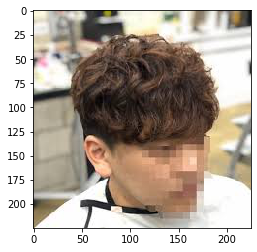

In [0]:
from PIL import Image

img = Image.open('./hairstyles/babyperm/google_베이비펌 picuki.com_0004.jpg')
print("original img shape : {}".format(np.array(img).shape))

# resize 
resized_img = np.array(img.resize((225,225))) # width, height
plt.imshow(resized_img)